In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,roc_curve, auc
from scipy.optimize import minimize, Bounds, LinearConstraint
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import collections
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ks_2samp
from helper.helper import eda_corr, eda_corr_diff,feature_eda, check_cluster, model_data_split, timer,Cross_Validation,PCA_cluster,Metrics_display, plot_metrics,fea_str_to_num,ks_test_cat,feature_selection


In [2]:
path = r'C:/Users/fanga/OneDrive/Documents/Coding/TD_interview_data/'
train = pd.read_csv(path + 'hackathon_test_main.csv')
test = pd.read_csv(path + 'hackathon_test_with_target_main_SOLUTION.csv')
feature_can = [i for i in train.columns if i not in ['CustomerId', 'IsActiveMember']]
target = 'IsActiveMember'
feature_can

['CreditScore',
 'City',
 'Gender',
 'Age',
 'BranchId',
 'Tenure',
 'Balance',
 'CurrencyCode',
 'PrefLanguage',
 'NumOfProducts',
 'PrimaryAcHolder',
 'HasOnlineService',
 'HasCrCard',
 'PrefContact',
 'EstimatedSalary']

### EDA



 CreditScore
CreditScore
850.000000    74
682.000000    29
667.000000    25
655.000000    23
631.000000    22
              ..
549.764362     1
705.095774     1
847.000000     1
695.623029     1
663.134597     1
Name: count, Length: 2452, dtype: int64


 City
City
Toronto     3268
Montreal    1581
Ottawa      1429
Name: count, dtype: int64


 Gender
Gender
Female    3642
Male      2636
Name: count, dtype: int64


 Age
Age
38    345
36    326
40    297
34    288
42    265
     ... 
81      1
84      1
75      1
83      1
92      1
Name: count, Length: 66, dtype: int64


 BranchId
BranchId
5892    6
4111    6
6382    5
2461    5
2837    5
       ..
6095    1
2205    1
7240    1
3288    1
3154    1
Name: count, Length: 4405, dtype: int64


 Tenure
Tenure
4     933
6     889
5     698
2     659
8     646
3     642
7     595
1     453
9     404
10    180
0     179
Name: count, dtype: int64


 Balance
Balance
0.0000         2206
131026.3971       1
136674.5100       1
138750.2318       1
6

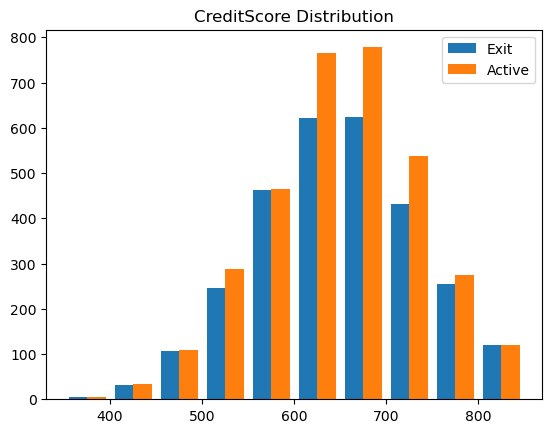

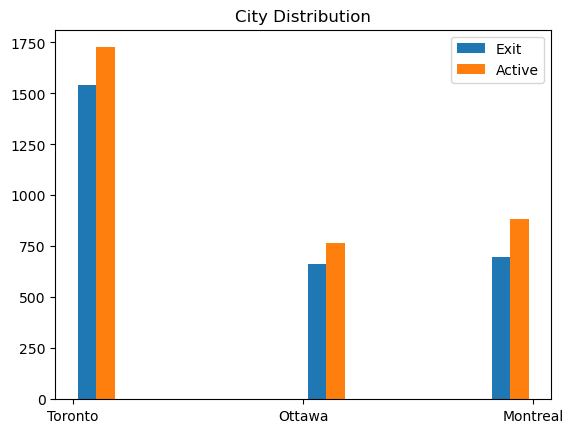

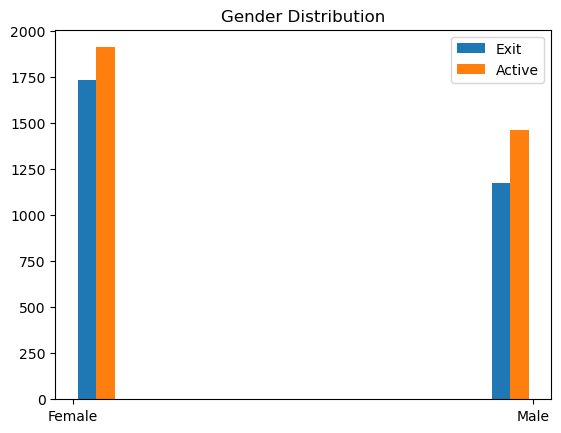

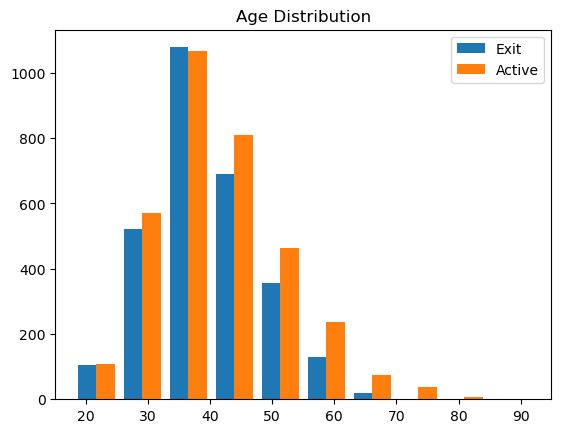

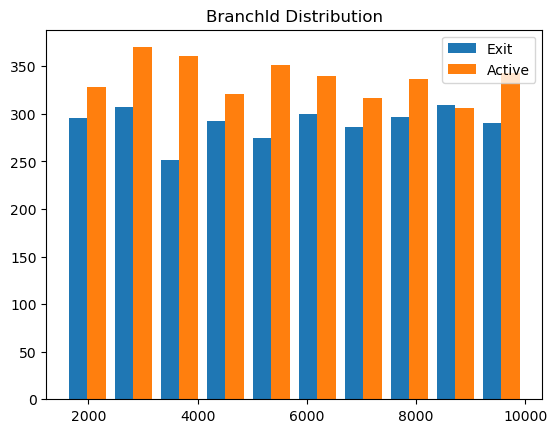

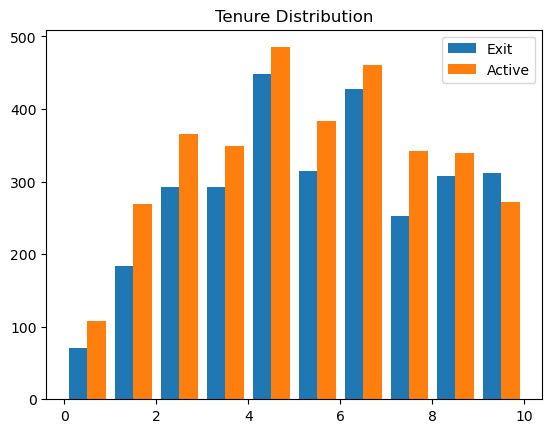

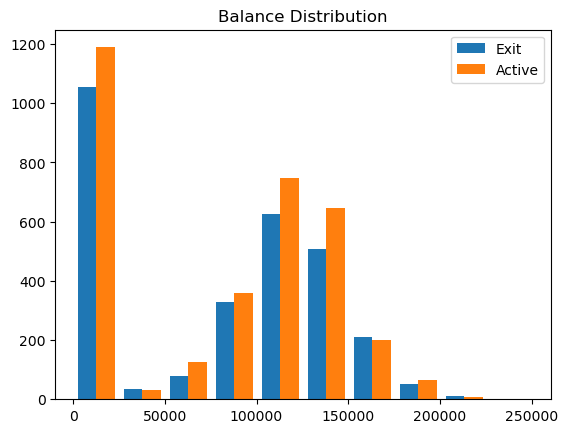

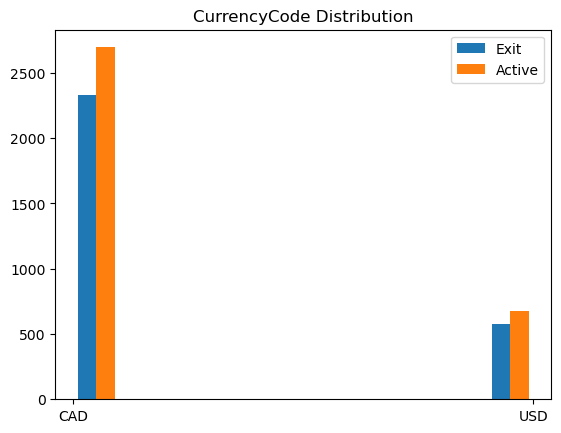

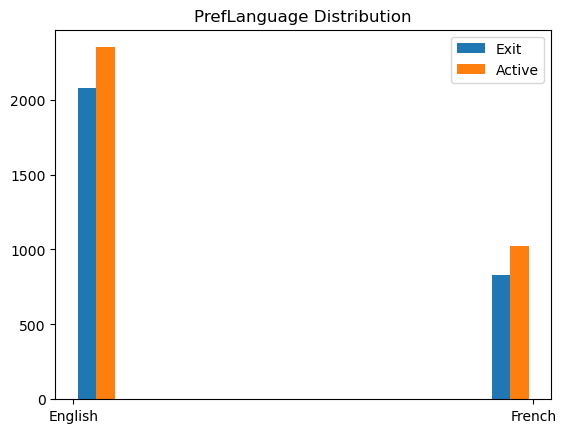

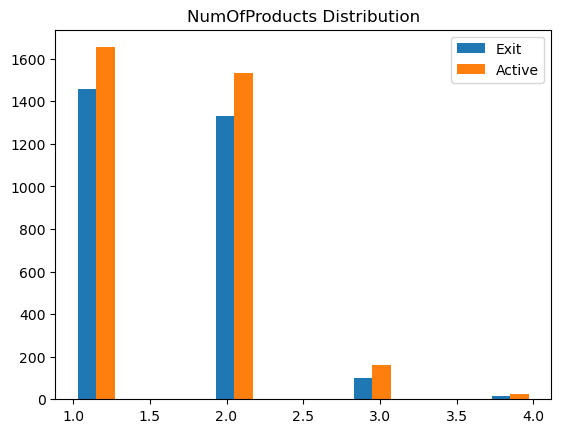

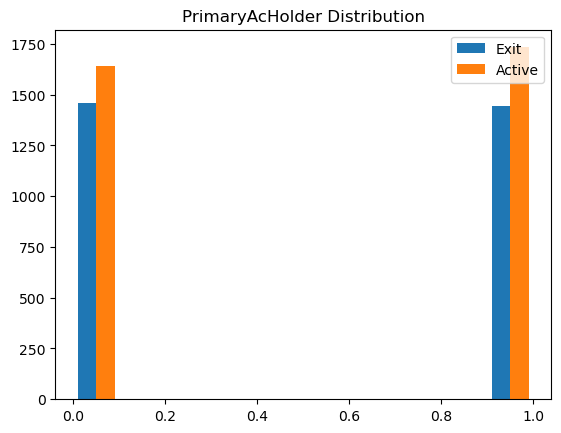

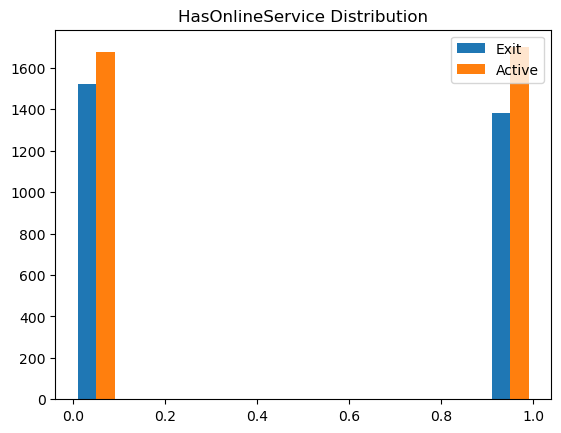

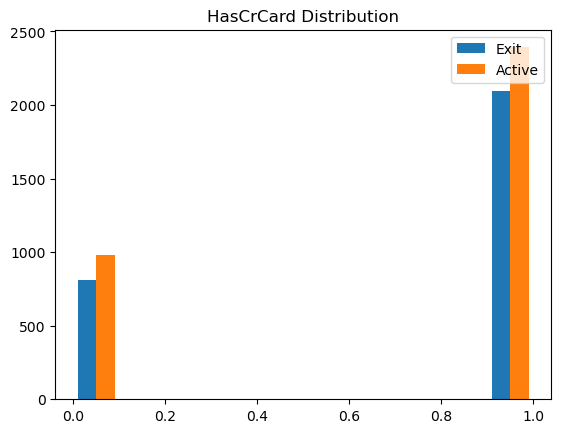

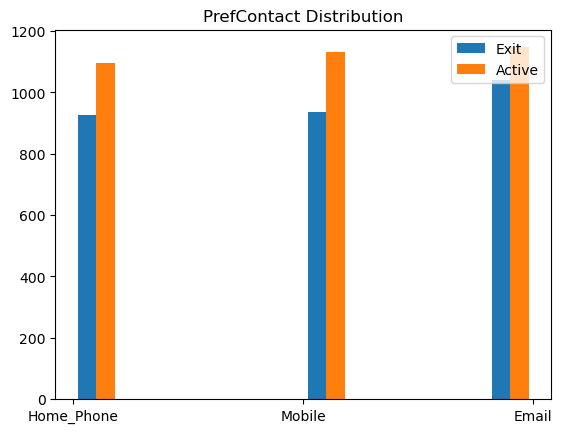

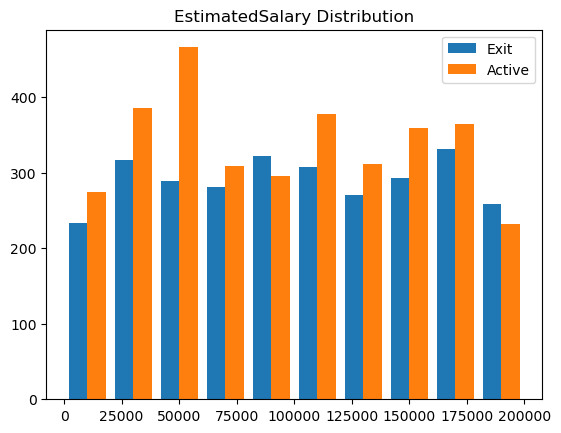

In [3]:
# check the missing rate, distributions for each factor
feature_eda(train,feature_can,target)

                  CreditScore      City    Gender       Age  BranchId   
CreditScore          0.000000  0.026030 -0.037189 -0.052216 -0.000569  \
City                 0.026030  0.000000 -0.034730  0.032373  0.028535   
Gender              -0.037189 -0.034730  0.000000 -0.103115  0.022731   
Age                 -0.052216  0.032373 -0.103115  0.000000  0.029623   
BranchId            -0.000569  0.028535  0.022731  0.029623  0.000000   
Tenure              -0.014099  0.040131  0.019318 -0.029472  0.019384   
Balance             -0.029685 -0.015333  0.031429  0.043286 -0.053480   
CurrencyCode         0.021135  0.008548  0.013206  0.033848  0.005170   
PrefLanguage         0.021957  0.000527 -0.021999 -0.003727 -0.015517   
NumOfProducts       -0.011666  0.017155 -0.019592 -0.046301  0.033772   
PrimaryAcHolder     -0.011755 -0.007994 -0.004998  0.028150 -0.025657   
HasOnlineService     0.026713 -0.022749 -0.006384 -0.048239 -0.002517   
HasCrCard            0.018813  0.008404 -0.033046 -

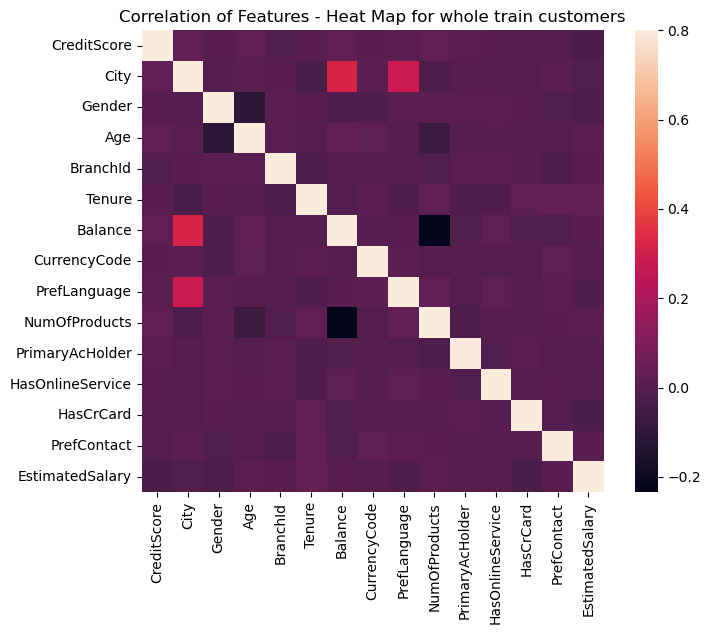

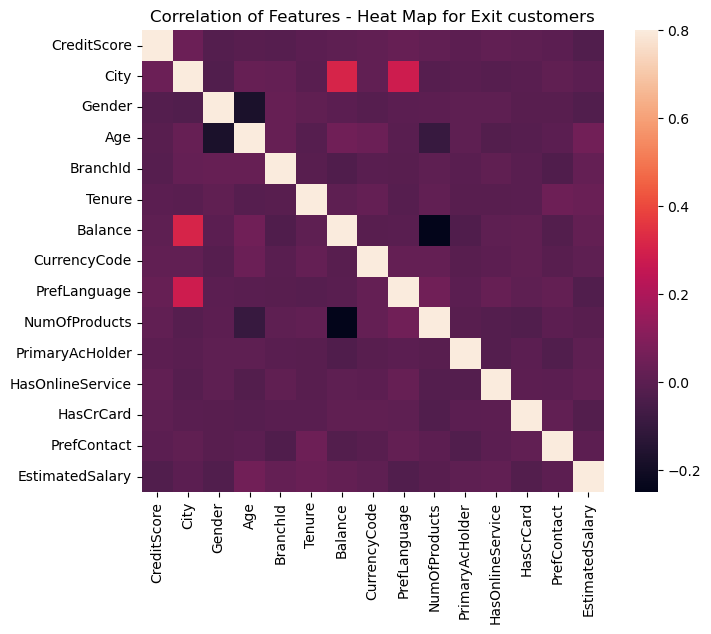

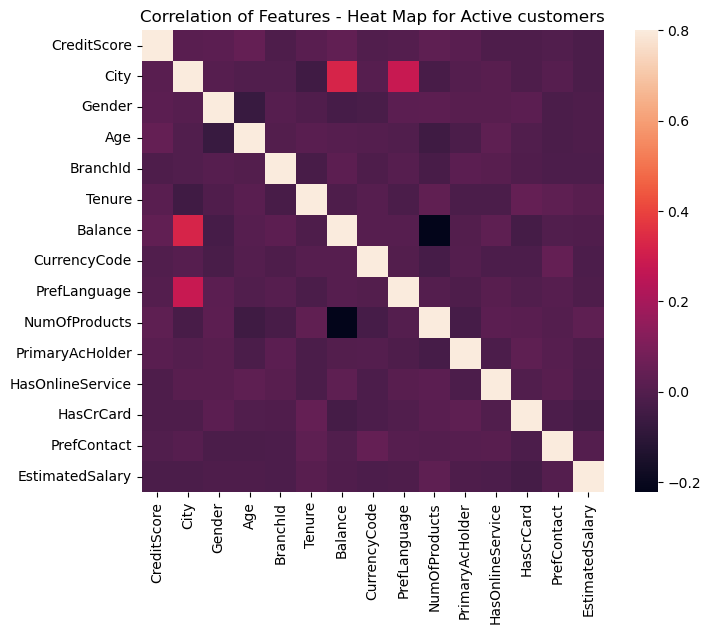

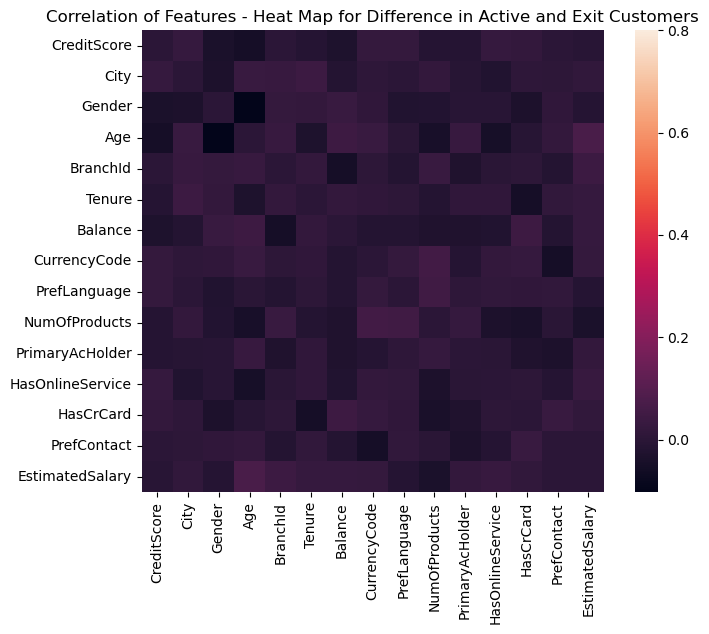

In [4]:
# check the correlations
train = fea_str_to_num(train)
eda_corr(train,feature_can,'Correlation of Features - Heat Map for whole train customers')
eda_corr(train[train[target]==0],feature_can,'Correlation of Features - Heat Map for Exit customers')
eda_corr(train[train[target]==1],feature_can,'Correlation of Features - Heat Map for Active customers')
eda_corr_diff(train,feature_can, target,'Correlation of Features - Heat Map for Difference in Active and Exit Customers')

(2904, 1)
(3374, 1)


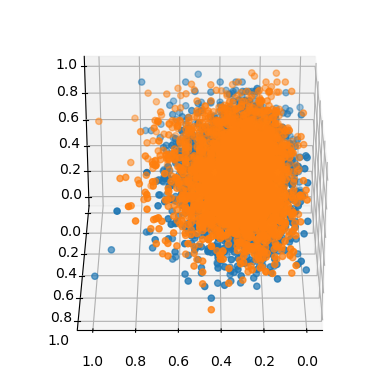

In [5]:
# to check if there are two clusters in 3D dimension
check_cluster(train,['CreditScore','Age','Tenure'],target,90)

(2904, 1)
(3374, 1)


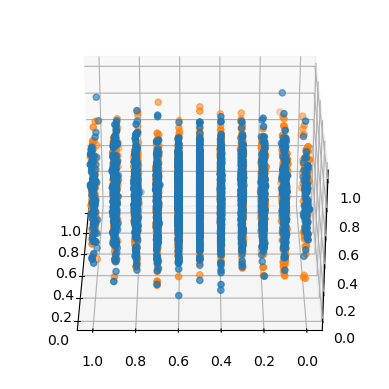

In [6]:
check_cluster(train,['CreditScore','Age','Tenure'],target,180)

(2904, 1)
(3374, 1)


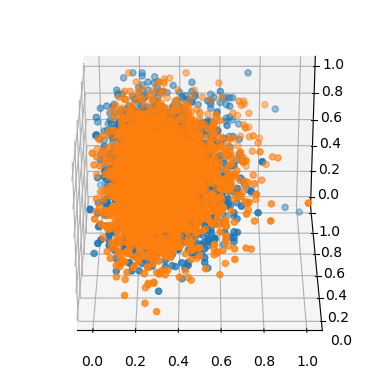

In [7]:
check_cluster(train,['CreditScore','Age','Tenure'],target,270)

(2904, 1)
(3374, 1)


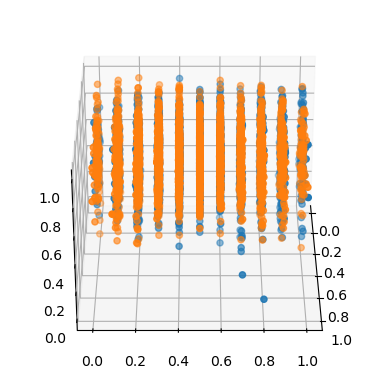

In [8]:
check_cluster(train,['CreditScore','Age','Tenure'],target,0)

(2904, 1)
(3374, 1)


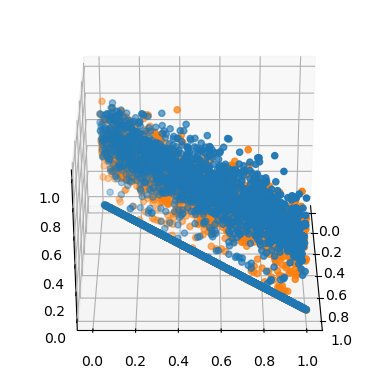

In [9]:
PCA_cluster(train,feature_can,target,0)

(2904, 1)
(3374, 1)


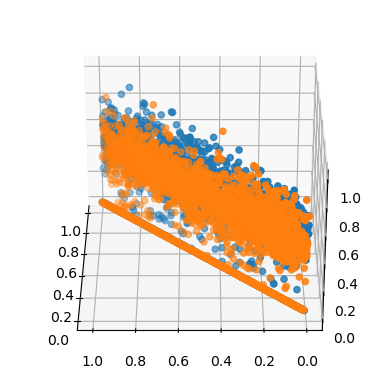

In [10]:
PCA_cluster(train,feature_can,target,180)

(2904, 1)
(3374, 1)


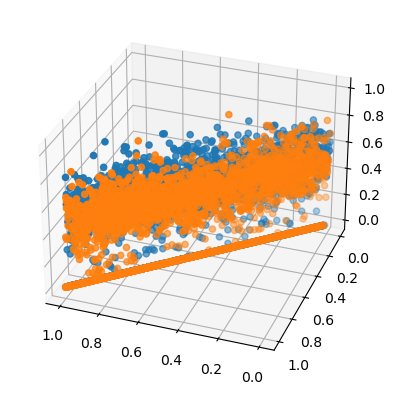

In [11]:
PCA_cluster(train,feature_can,target,110)

In [12]:
## ks test to see if the exit and active customer are coming  from the same distribution
weighted_ks = 0
categorical_features = ['City','Gender','Age','Tenure','CurrencyCode','PrefLanguage','NumOfProducts','PrimaryAcHolder','HasOnlineService','HasCrCard','PrefContact']
continuous_features = ['CreditScore','BranchId','Balance','EstimatedSalary']
for fea in categorical_features:
    sample1 = list(train[train[target] == 0][fea])
    sample2 = list(train[train[target] == 1][fea])
    D = ks_test_cat(sample1, sample2, fea)
    weighted_ks += D/(len(categorical_features)+len(continuous_features))

for fea in continuous_features:
    sample1 = list(train[train[target] == 0][fea])
    sample2 = list(train[train[target] == 1][fea])
    D,p = ks_2samp(sample1, sample2)
    print(fea, D)
    weighted_ks += D/(len(categorical_features)+len(continuous_features))

print('the weighted ks for the two population is', weighted_ks)


The Stats of City is 0.019432755098541588
The Stats of Gender is 0.02968433867151332
The Stats of Age is 0.07735543721963956
The Stats of Tenure is 0.034050901317970284
The Stats of CurrencyCode is 0.003242058457071595
The Stats of PrefLanguage is 0.01837336560082692
The Stats of NumOfProducts is 0.016808367666534485
The Stats of PrimaryAcHolder is 0.01638849017196814
The Stats of HasOnlineService is 0.02731693994425033
The Stats of HasCrCard is 0.012123579928181971
The Stats of PrefContact is 0.018518495838375115
CreditScore 0.033639596917605215
BranchId 0.02899930762058261
Balance 0.01836173068726822
EstimatedSalary 0.04447231380464123
the weighted ks for the two population is 0.026584511929664704


## Model Training

In [13]:
X_train, X_test, y_train, y_test = model_data_split(train,feature_can, target, norm_lst = None)

The coefficients for the logistic Regression is
    CreditScore      City    Gender       Age  BranchId    Tenure   Balance   
0    -0.079098  0.010383  0.169476  1.407692 -0.097845 -0.256089  0.117375  \

   CurrencyCode  PrefLanguage  NumOfProducts  PrimaryAcHolder   
0      0.022229      0.087845       0.316203         0.097655  \

   HasOnlineService  HasCrCard  PrefContact  EstimatedSalary  
0          0.061563  -0.023172     0.128272        -0.320143  


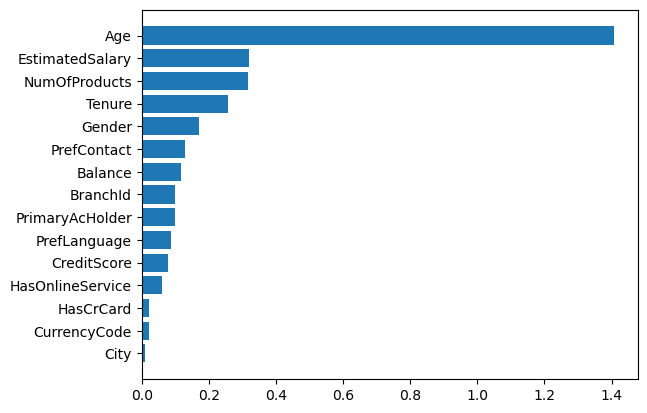


Time Taken: 0.0 hour 0.0 minites and 0.14 seconds


In [14]:
#LR
LR_model,scaler, probs_LR, ridge_auc_temp_LR = feature_selection(X_train, y_train, X_test, y_test,algo = 'LR')

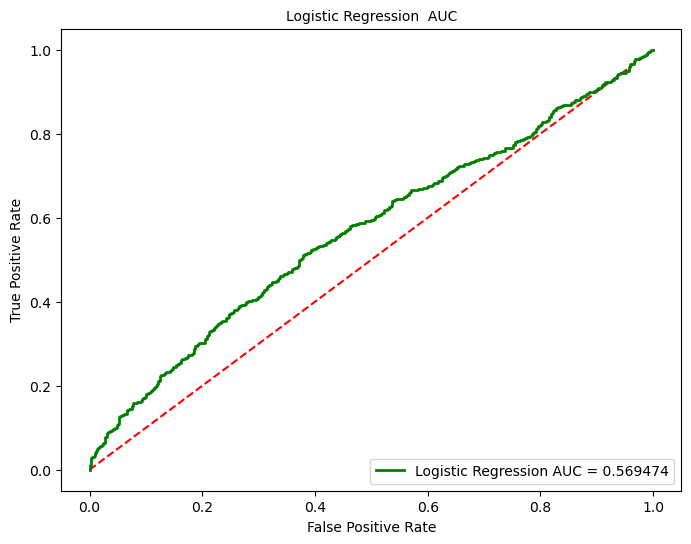

In [15]:
plot_metrics(probs_LR, 'Logistic Regression', y_test)


Feature Importance
                  Importances
EstimatedSalary      0.157491
CreditScore          0.149077
BranchId             0.148294
Age                  0.131123
Balance              0.108429
Tenure               0.085551
PrefContact          0.036355
City                 0.031161
NumOfProducts        0.030358
HasOnlineService     0.022539
PrimaryAcHolder      0.021999
HasCrCard            0.021784
Gender               0.019315
PrefLanguage         0.018768
CurrencyCode         0.017756


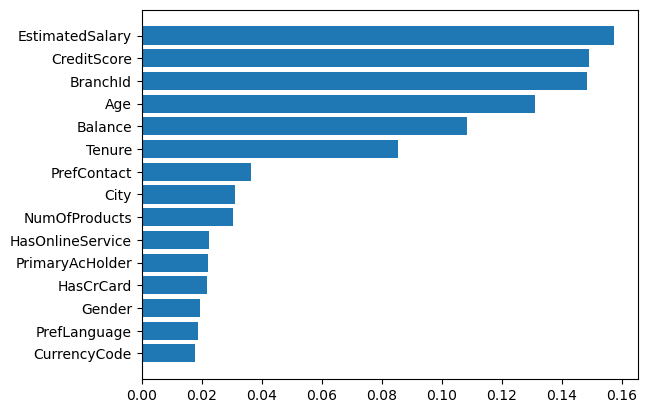


Time Taken: 0.0 hour 0.0 minites and 0.68 seconds


In [16]:
#RF
RF_model,_, probs_RF, ridge_auc_temp_RF = feature_selection(X_train, y_train, X_test, y_test,algo = 'RF')

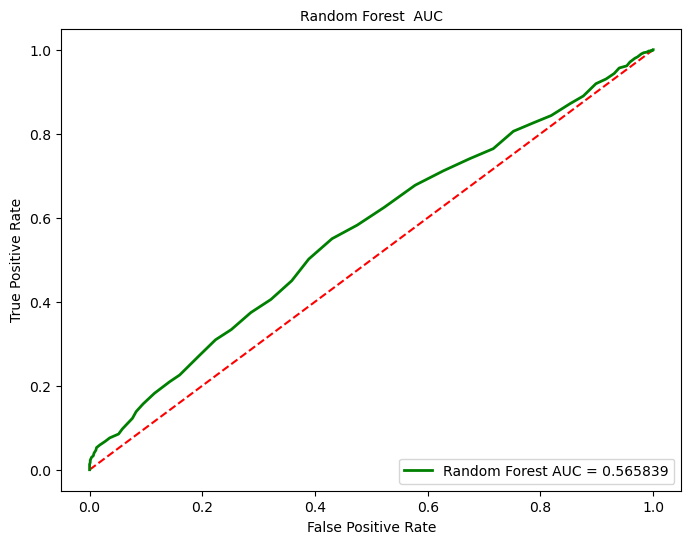

In [17]:
plot_metrics(probs_RF, 'Random Forest', y_test)

[21:08:32] WARNING: D:\bld\xgboost-split_1679035243975\work\src\learner.cc:767: 
Parameters: { "eval_metrics" } are not used.


Feature Importance
                  Importances
Age                  0.091101
Gender               0.081172
City                 0.079865
EstimatedSalary      0.075074
PrimaryAcHolder      0.072915
NumOfProducts        0.069246
HasCrCard            0.068470
BranchId             0.066286
Tenure               0.064973
CurrencyCode         0.062277
CreditScore          0.062258
Balance              0.059328
PrefLanguage         0.056865
PrefContact          0.048668
HasOnlineService     0.041502


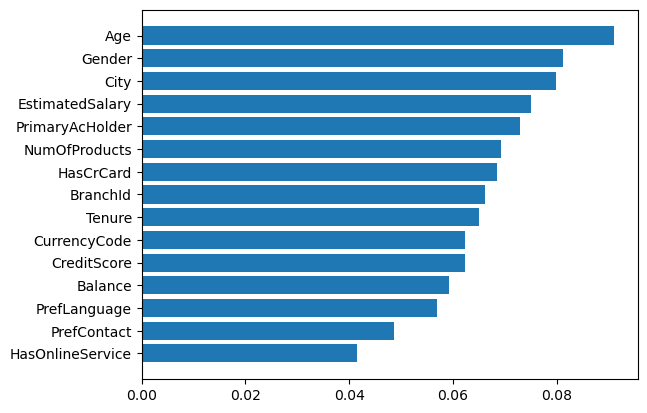


Time Taken: 0.0 hour 0.0 minites and 0.21 seconds


In [24]:
#XGboost
XGB_model,_, probs_XGB, ridge_auc_temp_XGB = feature_selection(X_train, y_train, X_test, y_test,algo = 'XGB')

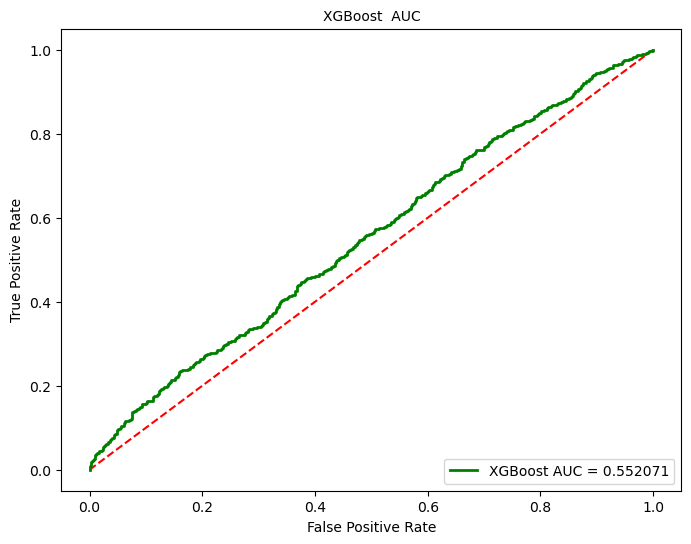

In [25]:
plot_metrics(probs_XGB, 'XGBoost', y_test)

c:\Users\fanga\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


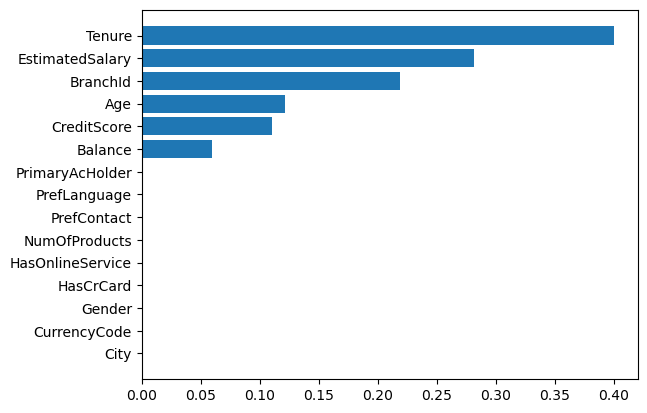


Time Taken: 0.0 hour 0.0 minites and 0.12 seconds


In [28]:
#XGboost
SVM_model ,_, probs_SVM, ridge_auc_temp_SVM = feature_selection(X_train, y_train, X_test, y_test,algo = 'SVM')

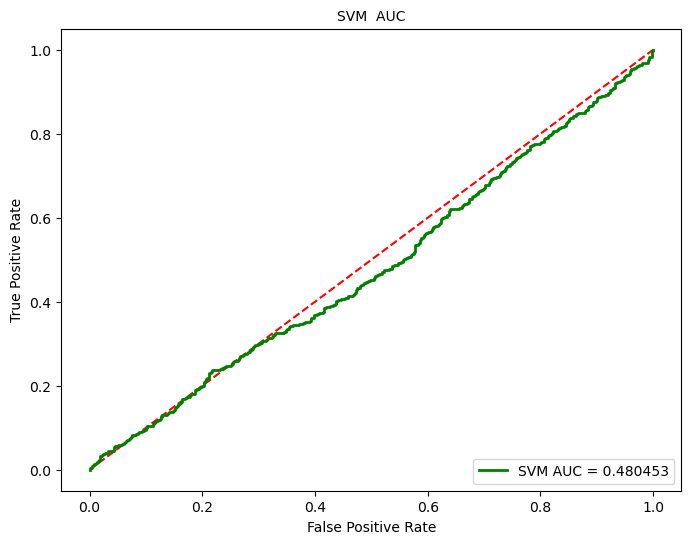

In [29]:
plot_metrics(probs_SVM, 'SVM', y_test)

In [30]:
print('--------------------------LR ------------------------------')
Metrics_display('LR',probs_LR, y_test)
print('\n--------------------------Random Forest ------------------------------')
Metrics_display('RF',probs_RF, y_test)
print('\n--------------------------XGBoost ------------------------------')
Metrics_display('XGB',probs_XGB, y_test)
print('\n--------------------------SVM ------------------------------')
Metrics_display('SVM',probs_SVM, y_test)

--------------------------LR ------------------------------
   accuracy  recall  precision  roc_auc_score
0  0.475053     0.0        0.0            0.5

--------------------------Random Forest ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.554671  0.624874   0.569061       0.550984

--------------------------XGBoost ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.531316  0.614762   0.547748       0.526934

--------------------------SVM ------------------------------
   accuracy  recall  precision  roc_auc_score
0  0.524947     1.0   0.524947            0.5


c:\Users\fanga\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### After Feature selection, final model building

In [31]:
feature_final = ['Age','EstimatedSalary','CreditScore','BranchId','Balance','Tenure','NumOfProducts','PrefContact','Gender','City','PrimaryAcHolder']

alpha = np.linspace(0.05,100,100)

rf_params = {
    'max_depth' : [1,2,3,4,5],
    'n_estimators': [100*x for x in range(1,6)],
    'min_samples_leaf': [ 5,10,15,20,25]
}
xgb_params = {
    'learning_rate': [0.01, 0.02,0.03,0.04,0.05],
    'min_child_weight': [1,5,10],
    'gamma': [0.5,1,1.5,2,2.5],
    'subsample' :[0.6,0.8,1.0],
    'colsample_bytree': [ 0.6,0.8,1.0],
    'max_depth' : [3,4,5],
    'monotone_constraints':[(0,0,1,0,0,0,0,0,0,0,-1),(0,0,0,0,0,0,0,0,0,0,0)]
}
svm_params = {
    'kernel':('linear', 'rbf','sigmoid'),
    'C':[0.1,10,100]
}

In [32]:
X_train, X_test, y_train, y_test = model_data_split(train,feature_final, target, norm_lst = None)

In [33]:
#LR
LR_model,scaler, probs_LR, ridge_auc_temp_LR, right_coef_df_LR = Cross_Validation(X_train, y_train, X_test, y_test,alpha, X_train.columns,algo = 'LR')

The optimal penalty term is  0.05
The coefficients for the logistic Regression is
       Age  EstimatedSalary  CreditScore  BranchId   Balance    Tenure   
0  0.7275        -0.254617     -0.03665  -0.07421  0.074932 -0.201012  \

   NumOfProducts  PrefContact    Gender      City  PrimaryAcHolder  
0       0.191613     0.114587  0.140635  0.045634         0.089025  

Time Taken: 0.0 hour 0.0 minites and 3.76 seconds


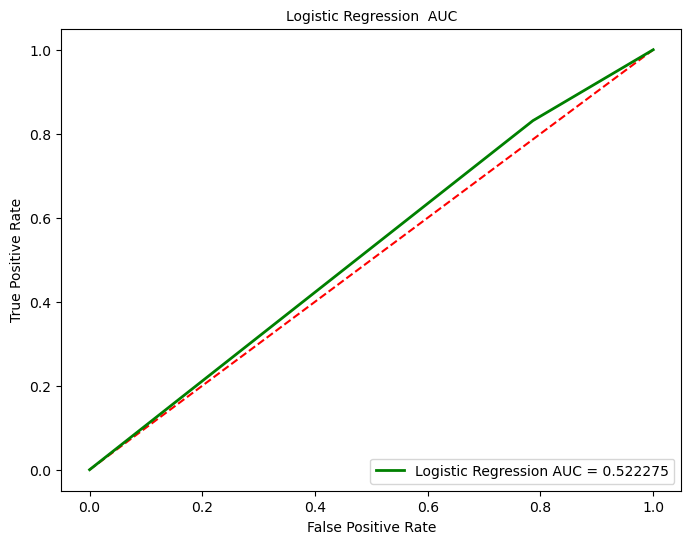

In [34]:
plot_metrics(probs_LR, 'Logistic Regression', y_test)

In [35]:
#RF
RF_model,_, probs_RF, ridge_auc_temp_RF, right_coef_df_RF = Cross_Validation(X_train, y_train, X_test, y_test,alpha, X_train.columns,algo = 'RF', params = rf_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Estimator:
RandomForestClassifier(max_depth=5, min_samples_leaf=25, n_estimators=400,
                       random_state=42)

Feature Importance
                 Importances
Age                 0.295375
EstimatedSalary     0.198353
CreditScore         0.122285
BranchId            0.112262
Balance             0.087309
Tenure              0.085267
NumOfProducts       0.024302
Gender              0.022013
City                0.021385
PrefContact         0.018678
PrimaryAcHolder     0.012772

Best Parameters:
{'n_estimators': 400, 'min_samples_leaf': 25, 'max_depth': 5}

Time Taken: 0.0 hour 0.0 minites and 35.82 seconds


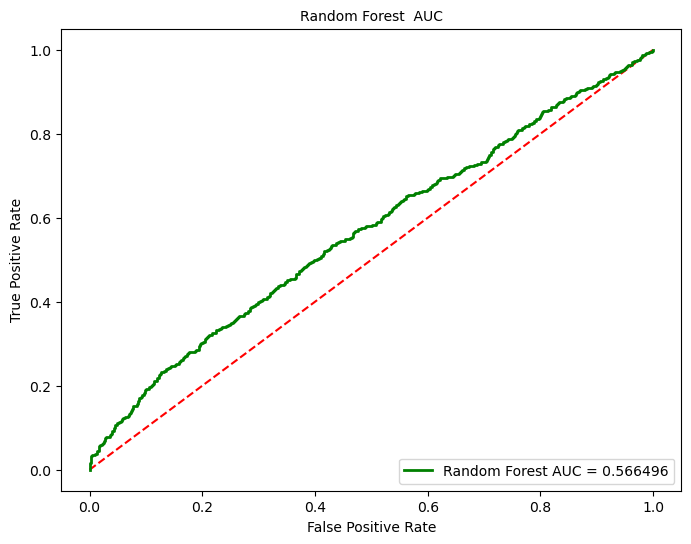

In [ ]:
plot_metrics(probs_RF, 'Random Forest', y_test)

In [ ]:
#XGboost
XGB_model,_, probs_XGB, ridge_auc_temp_XGB, right_coef_df_XGB = Cross_Validation(X_train, y_train, X_test, y_test,alpha, X_train.columns,algo = 'XGB', params = xgb_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[21:16:21] WARNING: D:\bld\xgboost-split_1679035243975\work\src\learner.cc:767: 
Parameters: { "eval_metrics" } are not used.


Best Estimator:
XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan,
              monotone_constraints=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
              n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)

Feature 

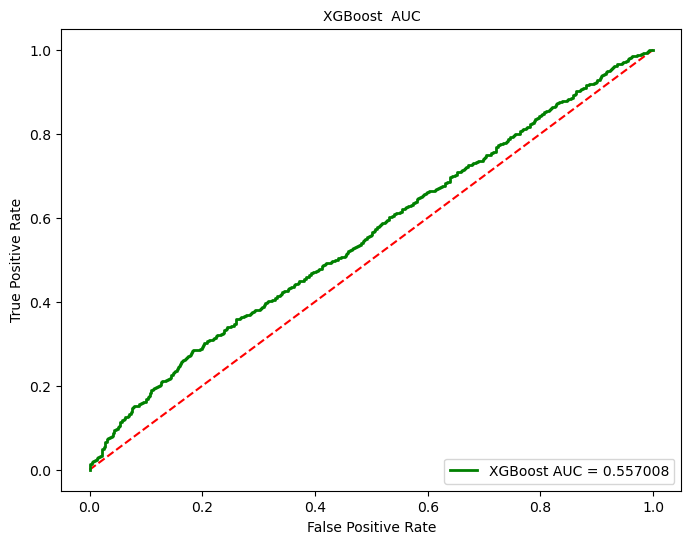

In [ ]:
plot_metrics(probs_XGB, 'XGBoost', y_test)

In [ ]:
#XGboost
SVM_model ,_, probs_SVM, ridge_auc_temp_SVM, right_coef_df_SVM = Cross_Validation(X_train, y_train, X_test, y_test,alpha, X_train.columns,algo = 'SVM', params = svm_params,param_comb = 2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best Estimator:
SVC(C=100, probability=True)

Best Estimator:
SVC(C=100, probability=True)

Time Taken: 0.0 hour 0.0 minites and 10.54 seconds


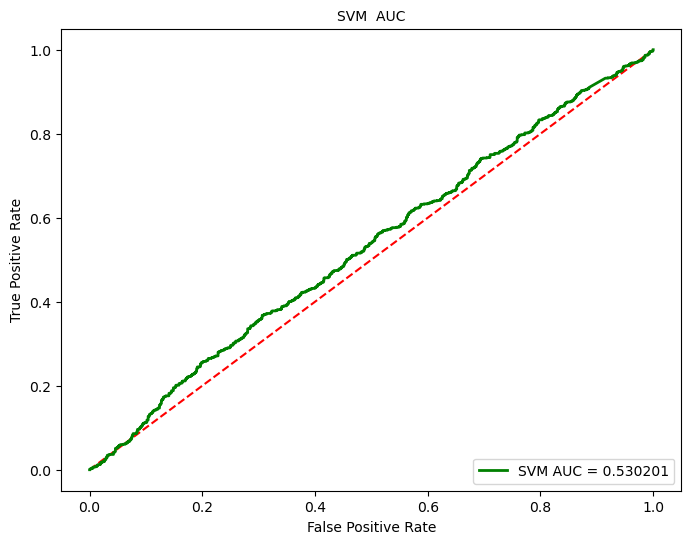

In [ ]:
plot_metrics(probs_SVM, 'SVM', y_test)

In [ ]:
print('--------------------------LR ------------------------------')
Metrics_display('LR',probs_LR, y_test)
print('\n--------------------------Random Forest ------------------------------')
Metrics_display('RF',probs_RF, y_test)
print('\n--------------------------XGBoost ------------------------------')
Metrics_display('XGB',probs_XGB, y_test)
print('\n--------------------------SVM ------------------------------')
Metrics_display('SVM',probs_SVM, y_test)

--------------------------LR ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.537686  0.831143   0.538663       0.522275

--------------------------Random Forest ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.535032  0.899899   0.533893       0.515871

--------------------------XGBoost ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.532378  0.734075   0.540179       0.521786

--------------------------SVM ------------------------------
   accuracy   recall  precision  roc_auc_score
0  0.531847  0.91001   0.531601       0.511988


### apply it to the test dataset

In [ ]:
# LR
test = fea_str_to_num(test)


In [ ]:
test.head()

,CustomerId,CreditScore,City,Gender,Age,BranchId,Tenure,Balance,CurrencyCode,PrefLanguage,NumOfProducts,PrimaryAcHolder,HasOnlineService,HasCrCard,PrefContact,IsActiveMember,EstimatedSalary,y_test
0,15588850,638.024567,3,2,40,6011,9,131026.3971,1,1,4,0,1,0,3,1,6245.195617,1
1,15694636,672.000000,1,1,43,3680,8,125614.0300,1,1,2,1,1,1,3,0,95326.795000,1
2,15732376,752.698158,1,1,42,7221,2,0.0000,1,1,2,0,0,1,2,0,2076.860442,1
3,15574645,681.000000,1,1,63,6355,7,0.0000,1,1,2,1,1,1,3,1,55054.480000,0
4,15809589,773.000000,2,2,41,4263,9,102827.4400,1,2,1,1,1,0,2,1,64595.250000,0


In [ ]:
test_transform = scaler.fit_transform(test[feature_final])
test_transform = test_transform.reshape(test[feature_final].shape)
test_transform = pd.DataFrame(test_transform, columns = feature_final)

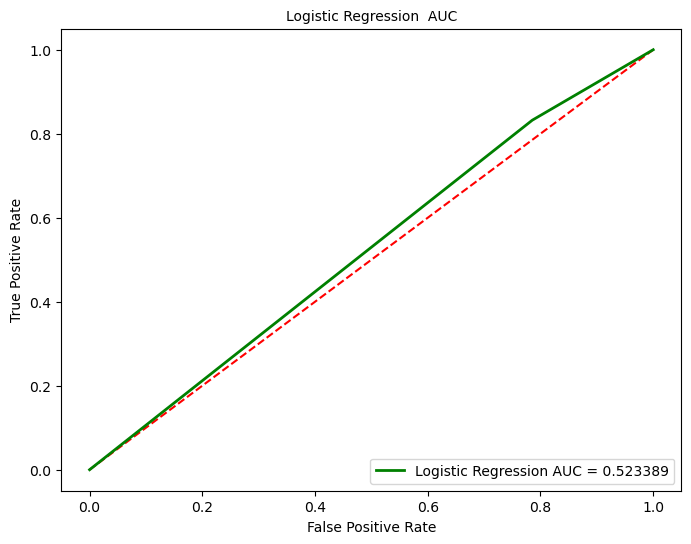

In [ ]:
LR_preds = LR_model.predict(test_transform)
plot_metrics(LR_preds, 'Logistic Regression', test[target])

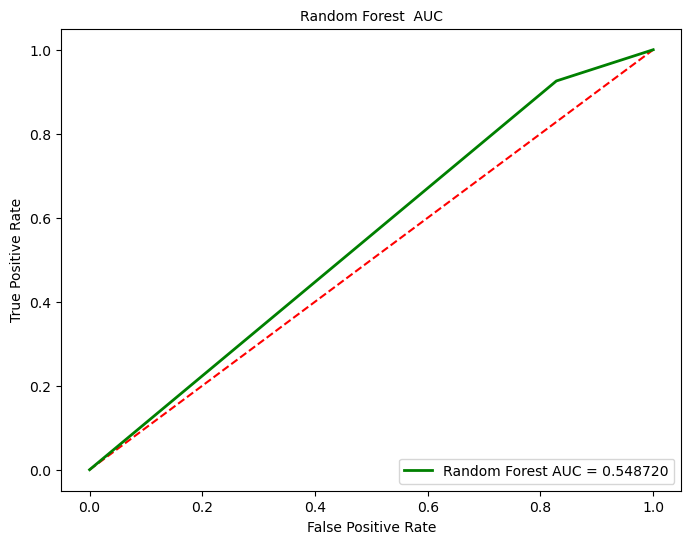

In [ ]:
RF_preds = RF_model.predict(test[feature_final])
plot_metrics(RF_preds, 'Random Forest', test[target])

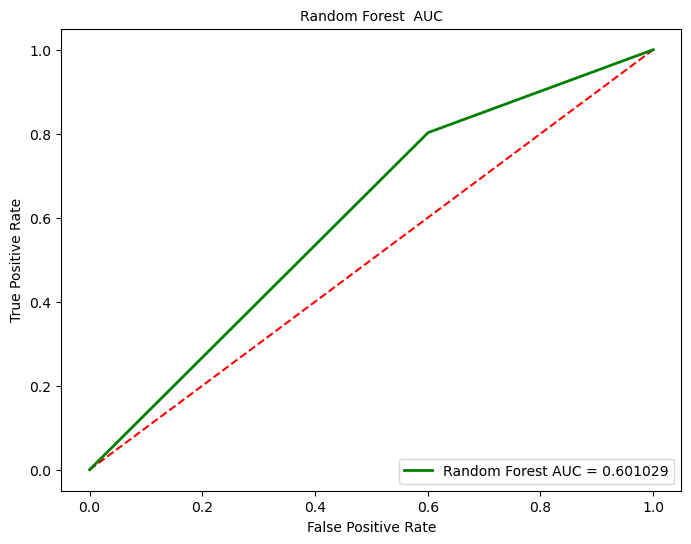

In [ ]:
XGB_preds = XGB_model.predict(test[feature_final])
plot_metrics(XGB_preds, 'Random Forest', test[target])

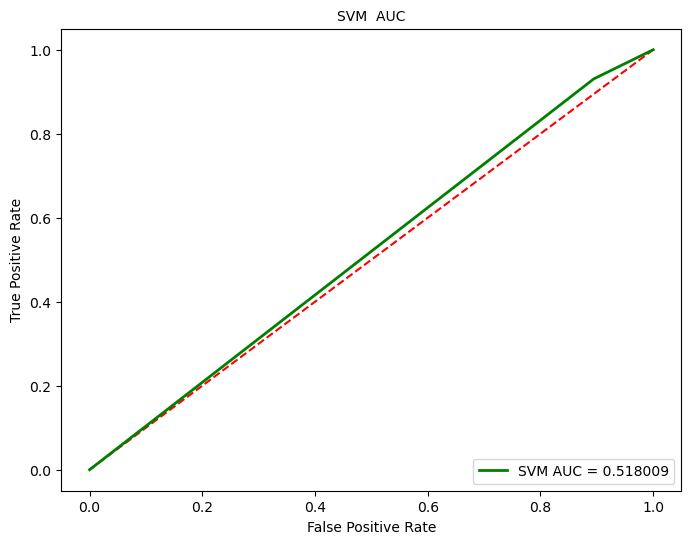

In [ ]:
SVM_preds = SVM_model.predict(test[feature_final])
plot_metrics(SVM_preds, 'SVM', test[target])

In [ ]:
print('--------------------------LR ------------------------------')
Metrics_display('LR',LR_preds, test[target])
print('\n--------------------------Random Forest ------------------------------')
Metrics_display('RF',RF_preds, test[target])
print('\n--------------------------XGBoost ------------------------------')
Metrics_display('XGB',XGB_preds, test[target])
print('\n--------------------------SVM ------------------------------')
Metrics_display('SVM',SVM_preds, test[target])

--------------------------LR ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.546512  0.832247   0.551778       0.523389

--------------------------Random Forest ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.576935  0.925608   0.564942        0.54872

--------------------------XGBoost ------------------------------
   accuracy    recall  precision  roc_auc_score
0   0.61612  0.802608   0.608266       0.601029

--------------------------SVM ------------------------------
   accuracy    recall  precision  roc_auc_score
0  0.548901  0.930646   0.547229       0.518009


In [ ]:
train.shape

(6278, 20)

In [ ]:
train.dtypes

CustomerId            int64
CreditScore         float64
City                  int64
Gender                int64
Age                   int64
BranchId              int64
Tenure                int64
Balance             float64
CurrencyCode          int64
PrefLanguage          int64
NumOfProducts         int64
PrimaryAcHolder       int64
HasOnlineService      int64
HasCrCard             int64
PrefContact           int64
IsActiveMember        int64
EstimatedSalary     float64
feature_1           float64
feature_2           float64
feature_3           float64
dtype: object

In [ ]:
train['CurrencyCode'].value_counts(dropna=False)

CurrencyCode
CAD    5024
USD    1254
Name: count, dtype: int64

In [ ]:
train['HasOnlineService'].value_counts(dropna=False)

HasOnlineService
0    3196
1    3082
Name: count, dtype: int64

In [ ]:
train['Gender'].value_counts(dropna=False)

Gender
Female    3642
Male      2636
Name: count, dtype: int64

In [ ]:
train['NumOfProducts'].value_counts(dropna=False)

NumOfProducts
1    3114
2    2863
3     261
4      40
Name: count, dtype: int64